In [1]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=10, usetex = False)

In [2]:
#Generate the chi2 samples
N = [1, 5, 10]
dof = 3

np.random.seed(1)
x = np.zeros((max(N), int(1e6)))
for i in range(max(N)):
    x[i] = np.random.chisquare(dof, int(1E6))

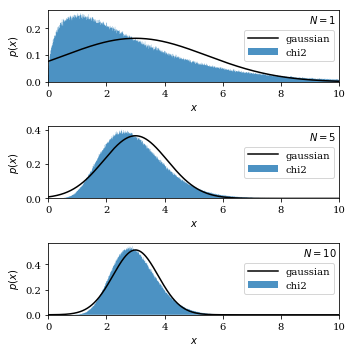

In [3]:
#Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i+1)

    #take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    #plot the histogram
    ax.hist(x_i, bins=np.linspace(0,10,1000), histtype='stepfilled', alpha=0.8, density=True, label = 'chi2')

    #plot the expected gaussian pdf
    mu = x_i.mean()
    sigma = np.sqrt(2.0*dof/N[i] )
    lin_space = np.linspace(0, 10, 1000)
    dist = norm(mu, sigma)
    ax.plot(lin_space, dist.pdf(lin_space), '-k', label='gaussian')
    ax.set_xlim(0.0, 10)

    plt.legend(loc = 'center right')

    ax.text(0.99, 0.95, r"$N = %i$" % N[i], ha='right', va='top', transform=ax.transAxes)

    ax.set_xlabel(r'$x$')
    ax.set_ylabel('$p(x)$')

plt.tight_layout()
plt.show()